In [ ]:
from spectralradex import radex
import numpy as np
from astropy import units as u 
from astropy import constants as c
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('paper')

In [94]:
params = radex.get_example_grid_parameters()

params['tkin'] = np.arange(30, 150, 10)
params['h2'] = 10**np.arange(2, 6.5, 0.1)
params['linewidth'] = [1, 5, 10, 20]

N_h2 = 8.5e22 
X_hnco = 10**np.arange(-9, -6.5, 0.1)
params['cdmol'] = X_hnco * N_h2

params['molfile'] = 'hnco.dat'
params['fmin'] = 87.925
params['fmax'] = 87.926

grid_df = radex.run_grid(params, target_value="T_R (K)")

In [ ]:
grid_df.to_csv('./../data/radex/grid_df.csv')
grid = Table.read('./../data/radex/grid_df.csv')

grid['col0'].name = 'id'
grid['h2'].name = 'nh2'
grid['cdmol'].name = 'Nh2'
grid['(4_0_4)-(3_0_3)[87.92523962 GHz]'].name = 'I_hnco'

grid.add_column(list(X_hnco) * int(len(grid_df)/len(X_hnco)), name='X_hnco')

Text(0.5, 0, 'nh2')

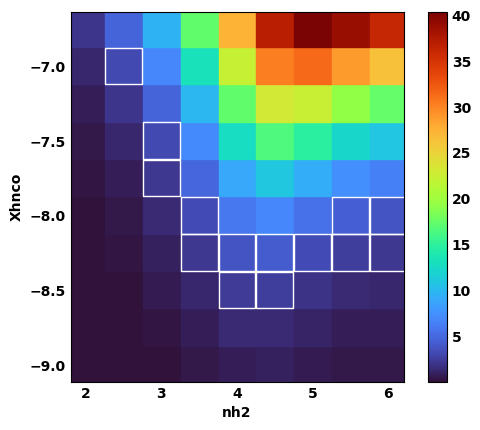

In [95]:
grid_masked = grid[grid['tkin'] == 60]

x = np.log10(grid_masked['nh2'])
y = np.log10(grid_masked['X_hnco'])
z = grid_masked['I_hnco']

fig, ax = plt.subplots()

mask = (z>2)&(z<4.5)
sc = plt.scatter(x,y,c=z,cmap='turbo',marker='s', s=700)
ax.scatter(x[mask],y[mask], fc='none', ec='white', s=700, marker='s')

plt.colorbar(sc)

ax.set_box_aspect(1.11)

ax.set_ylabel('Xhnco')
ax.set_xlabel('nh2')

Text(0.5, 0, 'nh2')

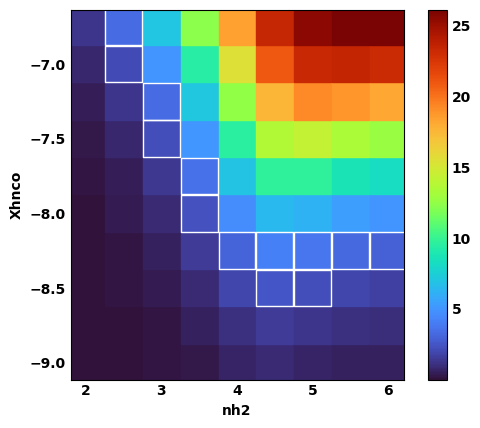

In [96]:
grid_masked = grid[grid['tkin'] == 30]

x = np.log10(grid_masked['nh2'])
y = np.log10(grid_masked['X_hnco'])
z = grid_masked['I_hnco']

fig, ax = plt.subplots()

mask = (z>2)&(z<4.5)
sc = plt.scatter(x,y,c=z,cmap='turbo',marker='s', s=700)
ax.scatter(x[mask],y[mask], fc='none', ec='white', s=700, marker='s')

plt.colorbar(sc)

ax.set_box_aspect(1.11)

ax.set_ylabel('Xhnco')
ax.set_xlabel('nh2')

Text(0.5, 0, 'nh2')

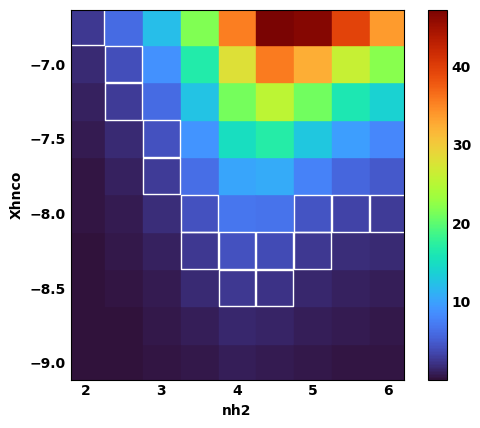

In [100]:
grid_masked = grid[grid['tkin'] == 120]

x = np.log10(grid_masked['nh2'])
y = np.log10(grid_masked['X_hnco'])
z = grid_masked['I_hnco']

fig, ax = plt.subplots()

mask = (z>2)&(z<4.5)
sc = plt.scatter(x,y,c=z,cmap='turbo',marker='s', s=700)
ax.scatter(x[mask],y[mask], fc='none', ec='white', s=700, marker='s')

plt.colorbar(sc)

ax.set_box_aspect(1.11)

ax.set_ylabel('Xhnco')
ax.set_xlabel('nh2')